# Sub Analysis of Pedestrians and Cyclists Under 16

This brief sub-analysis explores patterns in fatal road transport accidents involving **child pedestrians and cyclists** in Australia from 1989 to present. These road users are considered **vulnerable** due to their physical fragility and limited situational awareness.

The notebook focuses on identifying:
- Long-term trends in child pedestrian and cyclist fatalities
- Temporal and gender-based differences
- Key risk periods by month, day, and time

Findings from this analysis can support targeted interventions to improve road safety for children and non-motorized road users.

## 1. Key Findings

- **Fatalities Have Declined**: Both pedestrian and cyclist fatalities have steadily decreased since 1989, with more pronounced reductions among pedestrians.
- **Gender Disparity**: Males make up the majority of fatalities in both cohorts, especially among cyclists (87%).
- **High-Risk Time Windows**: Most fatalities occur on weekdays during school commute hours — especially 3–6 pm.
- **Seasonal Trends**: Warmer months (particularly March) see more fatalities, suggesting increased outdoor activity or exposure.
- **State Patterns**: New South Wales consistently reports the highest number of fatalities, even in recent years.


## 2. Data Cleaning

Data cleaning pipeline is imported from the `data_cleaning.py` file. The pipeline includes functions to load the data, clean it, and filter it for the analysis.

In [1]:
"""
This notebook is fully self-contained and does not depend on the main EDA notebook.

The dataset is loaded and cleaned using `full_clean_pipeline()` from `scripts/data_cleaning.py`, which:
- Loads raw data from /data/Crash_Data.csv
- Cleans missing values and harmonizes variables
- Drops incomplete or irrelevant columns
- Returns a tidy, ready-to-analyze DataFrame
"""

# Set the directory for the script
import sys
sys.path.append("../scripts") 

# Importing necessary libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from data_cleaning import full_clean_pipeline

df = full_clean_pipeline()

# Create variable for the earliest and latest years in the dataset to be dynamically displayed in plot titles
latest_year = df['Year'].max()
earliest_year = df['Year'].min()
print(f"The dataset contains data from {earliest_year} to {latest_year}.")

The dataset contains data from 1989 to 2021.


In [2]:
# Create commonly used filtered DataFrames
children_under_16 = df[df['Age Group'] == '0_to_16']
child_ped_cyclist_fatalities = children_under_16[children_under_16['Road User'].isin(['Pedestrian', 'Pedal cyclist'])]
pedestrian_children = children_under_16[children_under_16['Road User'] == 'Pedestrian']
cyclist_children = children_under_16[children_under_16['Road User'] == 'Pedal cyclist']

print("Filtered DataFrames created:")
print(f"- children_under_16: {children_under_16.shape[0]} rows")
print(f"- child_ped_cyclist_fatalities: {child_ped_cyclist_fatalities.shape[0]} rows")
print(f"- pedestrian_children: {pedestrian_children.shape[0]} rows")
print(f"- cyclist_children: {cyclist_children.shape[0]} rows")

# Define constants for reuse
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',
               6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October',
               11: 'November', 12: 'December'}

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

custom_palette = {'Female': 'lightcoral', 'Male': 'skyblue'}



Filtered DataFrames created:
- children_under_16: 4080 rows
- child_ped_cyclist_fatalities: 1316 rows
- pedestrian_children: 982 rows
- cyclist_children: 334 rows



## 3. Vulnerable Road Users Visualization


Children are considered vulnerable road users due to their physical fragility and limited situational awareness. This analysis focuses on child pedestrians and cyclists involved in fatal road transport accidents in Australia from 1989 to present. The analysis aims to identify long-term trends, and gender-based differences, and key risk periods by month, day, and time. The findings can support targeted interventions to improve road safety for children and non-motorized road users.


## 3.1 Child Pedestrian and Cyclist Fatalities



### 3.1.1 Child Pedestrian and Cyclist Fatalities by Year

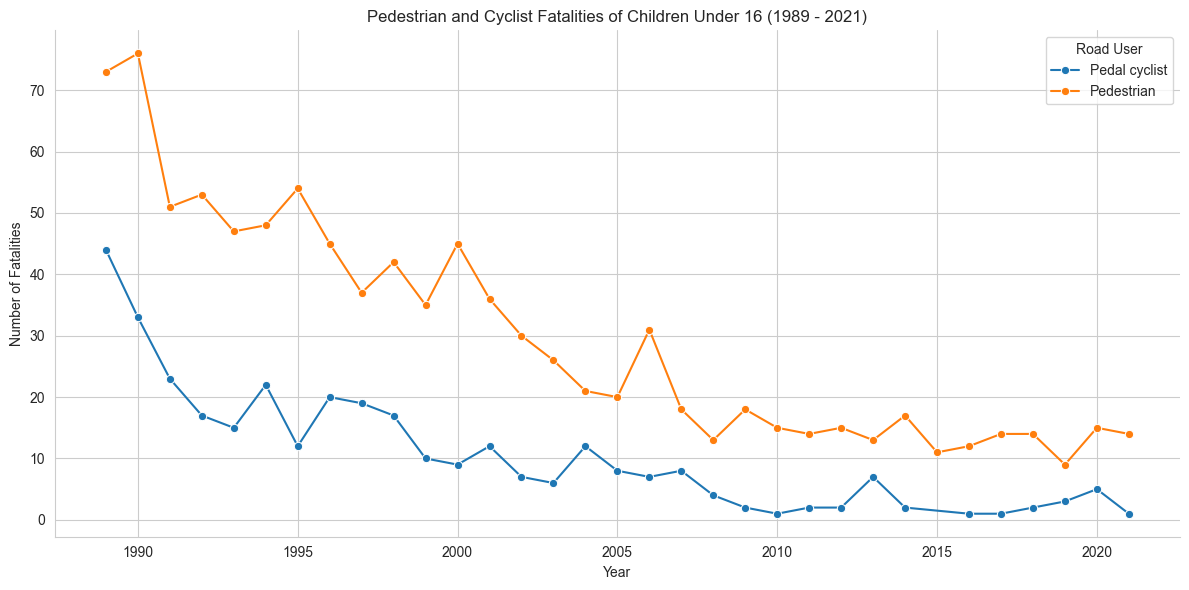

In [3]:
# Fatalities for Children Under 16 by Road User Type 
# Group data by Year and Road User, counting all Crash ID occurrences
fatalities_by_year_user_children = child_ped_cyclist_fatalities.groupby(['Year', 'Road User'])['Crash ID'].count().reset_index(name='Fatalities') # Changed variable name

# Plotting raw numbers of Fatalities for Children Under 16
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', 
            y='Fatalities',
            data=fatalities_by_year_user_children, 
            hue='Road User', 
            marker="o")
plt.title(f'Pedestrian and Cyclist Fatalities of Children Under 16 ({earliest_year} - {latest_year})')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.grid(True)
sns.despine()
plt.tight_layout()
plt.show()


Both groups show a substantial reduction in fatalities over time, particularly during the early 1990s. Pedestrian fatalities consistently outnumber cyclist fatalities by a wide margin, though both decline sharply from 1989 to the early 2000s before plateauing. Notably, pedestrian deaths fall from over 70 in 1989 to fewer than 20 per year by 2010, while cyclist fatalities drop from over 40 to fewer than 10 in the same period.

The rate of decline appears to slow post-2005, suggesting a possible floor effect or the limits of existing road safety interventions. This plateau may reflect the need for new strategies targeting high-risk environments, particularly in urban pedestrian zones.

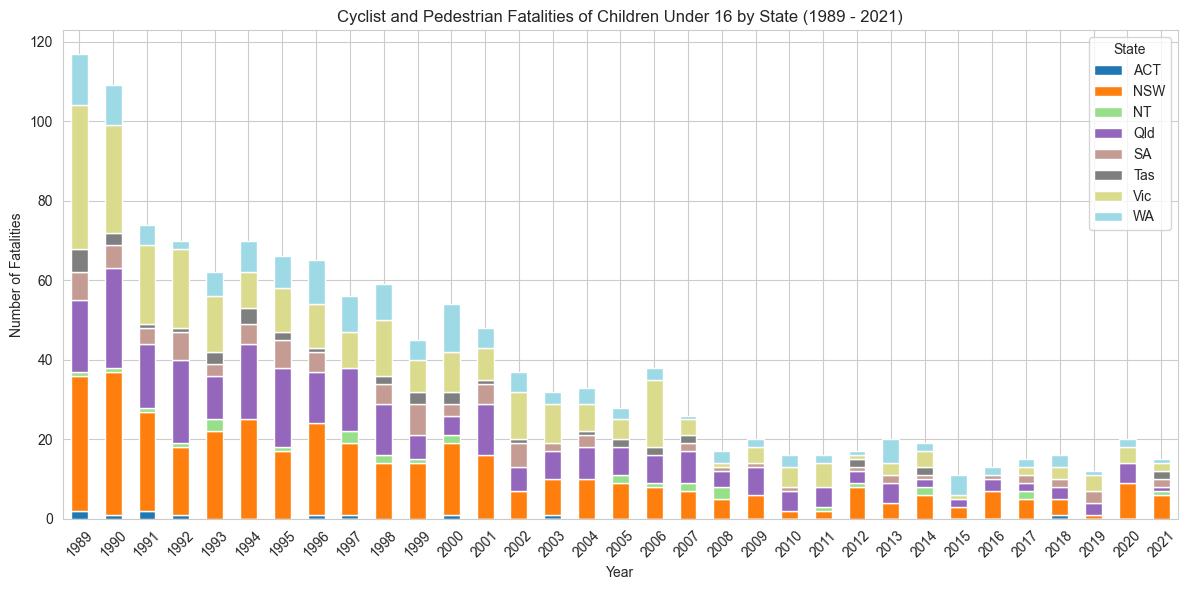

In [4]:
# Group data by Year and State, counting all Crash ID occurrences
fatalities_by_year_state = child_ped_cyclist_fatalities.groupby(['Year', 'State'])['Crash ID'].count().reset_index(name='Fatalities')

# Create a pivot table for the stacked bar chart
pivot_fatalities_state = fatalities_by_year_state.pivot(index='Year', columns='State', values='Fatalities').fillna(0)

# Sort the index to make sure years are in order
pivot_fatalities_state = pivot_fatalities_state.sort_index()

# Plotting raw numbers of pedal cyclist and pedestrian fatalities for children under 16 by state (stacked bar chart)
sns.set_style('whitegrid')
pivot_fatalities_state.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='tab20')
plt.title(f'Cyclist and Pedestrian Fatalities of Children Under 16 by State ({earliest_year} - {latest_year})')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.legend(title='State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Fatalities have declined across all jurisdictions over the past three decades, with the steepest reductions occurring in the early 1990s. New South Wales consistently recorded the highest number of child fatalities, followed by Victoria and Queensland. From around 2010 onward, most states reached relatively low and stable fatality counts, with smaller jurisdictions such as the ACT, Tasmania, and the Northern Territory reporting only isolated deaths in some years.

The overall downward trend suggests widespread improvements in road safety and child protection, though persistent differences between larger and smaller states may reflect underlying variations in population size, infrastructure, and road use exposure.

### 3.1.2 Child Pedestrian and Cyclist Fatalities by Month

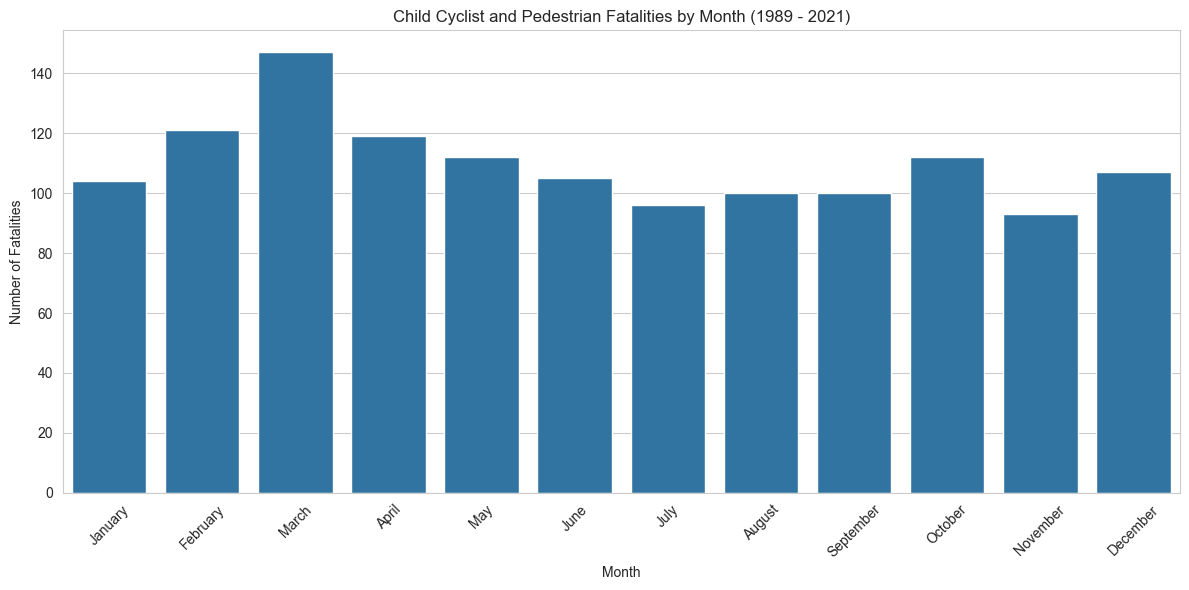

In [5]:
# Use the pre-defined DataFrame directly
month_counts_df = child_ped_cyclist_fatalities.copy() # Use copy only if adding column modifies original view, safer practice
month_counts_df['Month Name'] = month_counts_df['Month'].map(month_names)

# Calculate the number of accidents by month
month_counts = month_counts_df['Month Name'].value_counts().reset_index()
month_counts.columns = ['Month', 'Fatalities']
month_counts['Month'] = pd.Categorical(month_counts['Month'], categories=month_order, ordered=True) # Uses global month_order
month_counts = month_counts.sort_values('Month')

# Plotting a bar plot for monthly breakdown
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Fatalities', data=month_counts, dodge=False)
plt.title(f'Child Cyclist and Pedestrian Fatalities by Month ({earliest_year} - {latest_year})')
plt.xlabel('Month')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Notes to self:
# - March consistently shows the highest fatalities. Hypothesis: post-holiday period rush, school resumes, weather still warm.
# - Could explore whether public holidays or daylight changes contribute to spikes.
# - Consider overlaying school term calendars for more precision - using matplotlib


March records the highest number of fatalities, followed by February and April, suggesting a seasonal pattern linked to school terms and active travel. In contrast, July and November show the lowest fatality counts, coinciding with mid-year and end-of-year school holidays when children may be less exposed to traffic during commutes.

These patterns highlight the increased risk during school periods, particularly at the beginning of the academic year, and reinforce the need for targeted road safety campaigns and infrastructure improvements near schools and common travel routes.

### 3.1.3 Child Pedestrian and Cyclist Fatalities by Day of Week and Time of Day

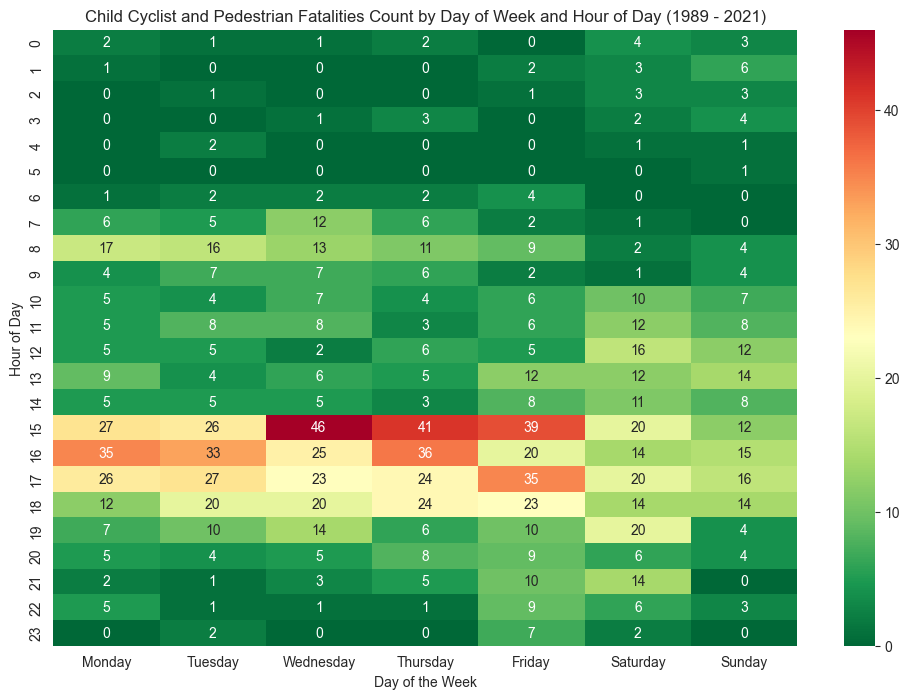

In [6]:
# Operate on a slice
heatmap_df = child_ped_cyclist_fatalities[['Time', 'Dayweek']]
# Dropping rows with missing values in 'Time' - creates a new DataFrame
heatmap_df = heatmap_df.dropna(subset=['Time']).copy() # Add copy here after dropna to avoid SettingWithCopyWarning

# Extracting the hour from the time field
heatmap_df['Hour'] = heatmap_df['Time'].str.split(':').str[0].astype(int)

# Creating a pivot table to convert the data into wide format
pivot_table = pd.pivot_table(heatmap_df,
                            values='Time',
                            index=['Hour'],
                            columns=['Dayweek'],
                            aggfunc='count',
                            fill_value=0)

# Reindex for consistency (optional but good practice)
pivot_table = pivot_table.reindex(range(24), fill_value=0)
pivot_table = pivot_table.reindex(columns=day_order, fill_value=0)


# Plotting a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, # Use reindexed table
            annot=True,
            cmap='RdYlGn_r', # Take a colour palette from https://loading.io/color/feature/RdYlGn-9/ and use _r to flip it so that red is higher and green is lower
            fmt='g')
plt.title(f'Child Cyclist and Pedestrian Fatalities Count by Day of Week and Hour of Day ({earliest_year} - {latest_year})')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of Day')
plt.show()

# Notes to self:
# - Strong peaks at 8–9 AM and 3–5 PM on weekdays likely align with school commute times.
# - Lighter activity on weekends, but Saturdays still have a mild peak in the afternoon.
# - Might be worth exploring how school safety campaigns or pedestrian crossings have changed over time.
# - Potential: Animate the heatmap across decades to see if patterns shift.


This heatmap shows when child pedestrian and cyclist fatalities (under 16) most commonly occur, broken down by hour of day and day of week (1989–2021). Redder areas indicate higher fatality counts, with the most dangerous time windows clearly concentrated on weekday afternoons. The highest peak is seen around 3 PM on Wednesdays (46 deaths), likely corresponding to school dismissal times. A smaller morning peak appears between 8–9 AM, reflecting school commute patterns.

On weekends, fatalities are lower overall and spread more evenly throughout the day, with a minor rise around 3 PM on Saturdays. These patterns highlight the need for targeted road safety measures during school travel hours, particularly in the afternoon when children may be less supervised and traffic volume is high.


### 3.1.4 Child Pedestrian and Cyclist Fatalities by Gender

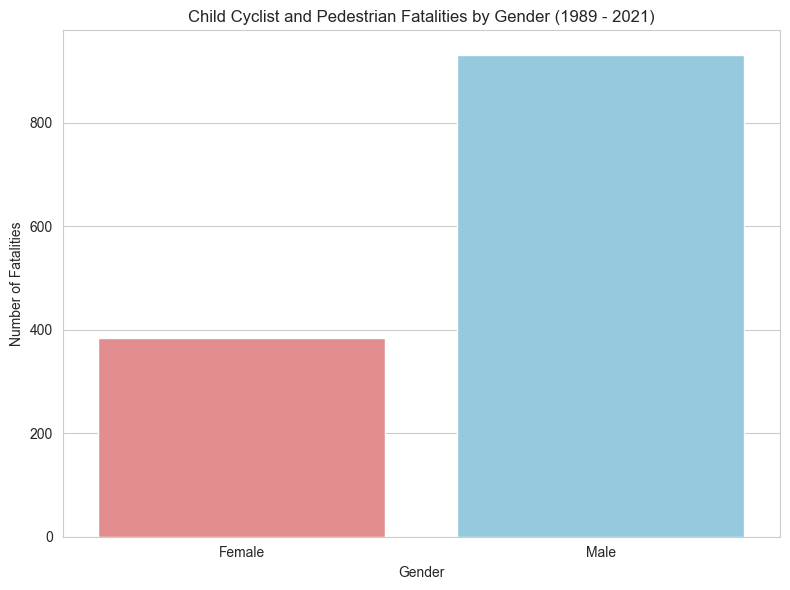

   Gender  Percentage
0  Female   29.179331
1    Male   70.820669


In [7]:
ped_cyclist_gender_fatalities = child_ped_cyclist_fatalities.dropna(subset=['Gender'])

# Group data by Gender, counting all Crash ID occurrences
ped_cyclist_gender_count = ped_cyclist_gender_fatalities.groupby('Gender')['Crash ID'].count().reset_index(name='Fatalities')

# Plotting a bar plot for Gender breakdown of combined pedestrian and cyclist fatalities
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Fatalities', data=ped_cyclist_gender_count, hue='Gender', palette=custom_palette, dodge=False, legend=False)
plt.title(f'Child Cyclist and Pedestrian Fatalities by Gender ({earliest_year} - {latest_year})') 
plt.xlabel('Gender')
plt.ylabel('Number of Fatalities')
plt.tight_layout()
plt.show()

# Calculate and print the percentage
ped_cyclist_gender_count['Percentage'] = (ped_cyclist_gender_count['Fatalities'] / ped_cyclist_gender_count['Fatalities'].sum()) * 100
print(ped_cyclist_gender_count[['Gender', 'Percentage']])

# Notes to self:
# - Significant male overrepresentation (71%) — this echoes broader patterns in injury epidemiology.
# - Consider referencing behavioural studies on risk-taking in boys vs girls.
# - Could be interesting to stratify by pedestrian vs cyclist — are boys more likely in one group?



Males account for 71% of fatalities, while females make up 29% — a ratio that aligns with global trends in child injury and trauma literature. Boys are consistently overrepresented in road trauma statistics, often attributed to differences in risk-taking behaviour, mobility patterns, and supervision levels.
These disparities suggest the need for gender-sensitive road safety education and interventions, particularly those that address behavioural risk factors among young boys.

## 3.2 Child Pedestrian Fatalities


In this section, we examine child pedestrian fatalities independently to identify risk patterns unique to this group. Isolating these incidents enables more precise policy recommendations around urban planning, traffic calming, and school zone safety.


### 3.2.1 Child Pedestiran Fatalities by Year

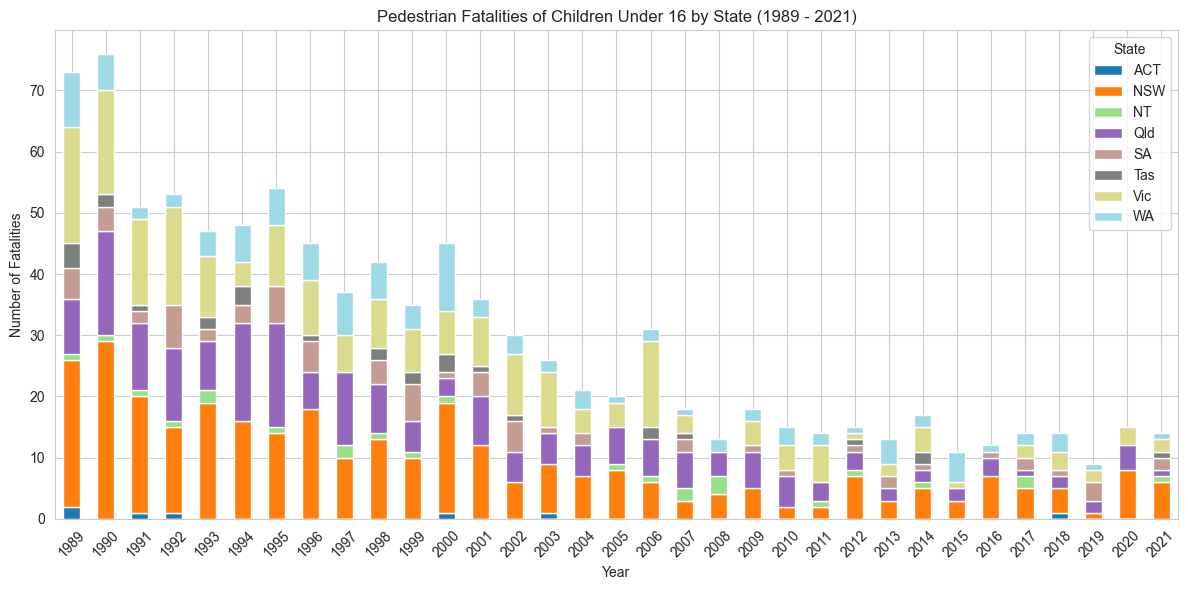

In [8]:

fatalities_by_year_state = pedestrian_children.groupby(['Year', 'State'])['Crash ID'].count().reset_index(name='Fatalities')

# Create a DataFrame with all years in the desired range (DYNAMIC)
all_years = pd.DataFrame({'Year': np.arange(earliest_year, latest_year + 1)})

# Merge this with the fatalities_by_year_state DataFrame to include all years
all_years_fatalities = pd.merge(all_years, fatalities_by_year_state, on='Year', how='left')

# Fill NaN States potentially introduced by left merge before pivoting (though less likely here)
# Fill NaN Fatalities with 0
all_years_fatalities['Fatalities'] = all_years_fatalities['Fatalities'].fillna(0)
# Ensure State column doesn't have NaNs if a year had 0 fatalities across all states (edge case)
# all_years_fatalities['State'] = all_years_fatalities['State'].fillna('Unknown') # Or handle differently if needed

# Create a pivot table for the stacked bar chart
# Need to handle potential multiple states per year after merge if not grouping first
pivot_fatalities_state = pd.pivot_table(all_years_fatalities, index='Year', columns='State', values='Fatalities', fill_value=0)


# Sort the index to make sure years are in order
pivot_fatalities_state = pivot_fatalities_state.sort_index()

# Plotting raw numbers of pedestrian fatalities for children under 16 by state (stacked bar chart)
sns.set_style('whitegrid')
pivot_fatalities_state.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='tab20')
plt.title(f'Pedestrian Fatalities of Children Under 16 by State ({earliest_year} - {latest_year})')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.legend(title='State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Notes to self:
# - Post-2016, NSW appears to spike in several years despite overall low fatality counts.
# - Check if these are isolated incidents or part of a broader trend.
# - Could normalise by child population in each state to see per capita risk.


This stacked bar chart shows the annual number of child pedestrian fatalities by state and territory from 1989 to 2021. While overall fatalities have decreased substantially over time, New South Wales (NSW) consistently reports higher counts than other jurisdictions, particularly in recent years (2016, 2017, 2020, and 2021). Even as fatalities fall below 10 per year in most states, NSW continues to contribute a disproportionate share.

However, because numbers in the later years are low, small fluctuations can appear large in relative terms, and should be interpreted cautiously. The continued presence of fatalities in NSW during this period may warrant further investigation into population density, urban traffic exposure, or pedestrian safety infrastructure.

### 3.2.2 Child Pedestrian Fatalities by Month

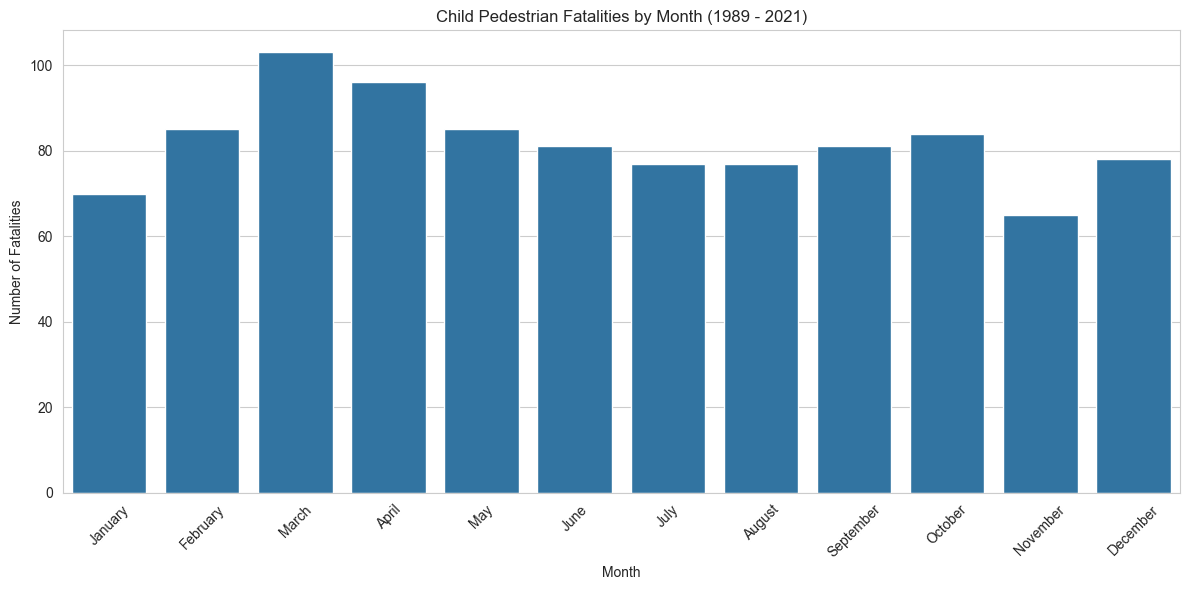

In [9]:
# Use the pre-defined DataFrame for pedestrian children directly
month_counts_ped_df = pedestrian_children.copy() # Use copy only if adding column modifies original view
month_counts_ped_df['Month Name'] = month_counts_ped_df['Month'].map(month_names) # Uses global month_names

# Calculate the number of fatalities by month
month_counts_pedestrian = month_counts_ped_df['Month Name'].value_counts().reset_index()
month_counts_pedestrian.columns = ['Month', 'Fatalities']

# Sort the months in order using the existing month_order list
month_counts_pedestrian['Month'] = pd.Categorical(month_counts_pedestrian['Month'], categories=month_order, ordered=True) # Uses global month_order
month_counts_pedestrian = month_counts_pedestrian.sort_values('Month')

# Plotting a bar plot for monthly breakdown of pedestrian fatalities
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Fatalities', data=month_counts_pedestrian, dodge=False, legend=False)
plt.title(f'Child Pedestrian Fatalities by Month ({earliest_year} - {latest_year})')
plt.xlabel('Month')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Notes to self:
# - Similar pattern to combined cohort — school months (esp. March/April) have higher fatality counts.
# - Slight dip during winter (June–August), potentially due to lower pedestrian activity or shorter days.
# - November dip is interesting — worth checking if linked to school exams or decreased mobility.
# - Future idea: plot weather data overlays or correlate with pedestrian traffic density.



This bar chart displays child pedestrian fatalities by month from 1989 to 2021. The distribution reveals a seasonal pattern, with higher fatalities in school-term months such as March and April, and a modest dip during mid-year winter months like June and July. March stands out as the peak month for fatalities, which may coincide with the return to school routines, busier traffic, and possibly less daylight in early mornings.

In contrast, November shows the lowest fatality count, possibly reflecting both end-of-year fatigue in reporting or reduced outdoor activity due to rising temperatures and school year winding down.


### 3.2.3 Child Pesestrian Fatalities by Day of Week and Time of Day

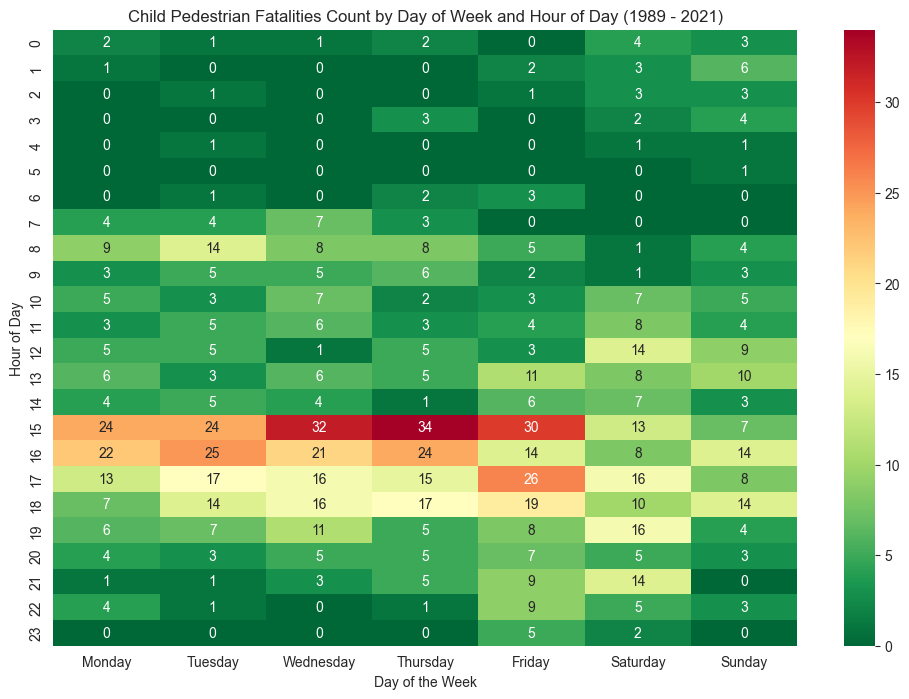

In [10]:
# Create a slice of the pedestrian_children DataFrame with relevant columns
heatmap_df_pedestrian = pedestrian_children[['Time', 'Dayweek']]

# Dropping rows with missing values in 'Time' - creates a new DataFrame
heatmap_df_pedestrian = heatmap_df_pedestrian.dropna(subset=['Time']).copy() # Add copy here

# Extracting the hour from the time field
heatmap_df_pedestrian['Hour'] = heatmap_df_pedestrian['Time'].str.split(':').str[0].astype(int)

# Creating a pivot table for pedestrian fatalities
pivot_table_pedestrian = pd.pivot_table(heatmap_df_pedestrian,
                                        values='Time',
                                        index=['Hour'],
                                        columns=['Dayweek'],
                                        aggfunc='count',
                                        fill_value=0)

# Reindex the pivot table to include all hours from 0 to 23, filling missing hours with 0
pivot_table_pedestrian = pivot_table_pedestrian.reindex(range(24), fill_value=0)

# Use the existing day_order list to ensure correct column order
pivot_table_pedestrian = pivot_table_pedestrian.reindex(columns=day_order, fill_value=0)


# Plotting a heatmap for pedestrian fatalities
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_pedestrian,
            annot=True,
            cmap='RdYlGn_r', # Using the same reversed Red-Yellow-Green colormap
            fmt='g') # Format annotation as general number
plt.title(f'Child Pedestrian Fatalities Count by Day of Week and Hour of Day ({earliest_year} - {latest_year})')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of Day')
plt.show()

# Future enhancement:
# - Animate or facet the heatmap by month to explore seasonality more clearly.
# - Overlay or bin hours relative to local sunrise/sunset times for each state — this would allow analysis of fatalities occurring in low-light vs daylight.
# - Could investigate whether higher fatality counts correlate with low-light hours in winter months, supporting visibility as a risk factor.
# - If sunrise/sunset data proves too fiddly, approximate “daylight” vs “dark” hours by state/season.
# - Add weather overlays (rainy vs clear days) if data is accessible — might show interesting visibility or road condition effects.


This heatmap illustrates the distribution of child pedestrian fatalities by hour of day and day of week from 1989 to 2021. The most prominent peaks occur on weekday afternoons, particularly around 3–5 PM, coinciding with typical school dismissal times. Notably, Wednesdays and Thursdays at 3–4 PM exhibit the highest fatality counts, suggesting recurring risk windows in the midweek. Weekend patterns are less pronounced but show modest activity in the late afternoons, particularly on Saturdays. Early morning and late evening hours show comparatively lower risk.


### 3.2.4 Child Pedestrian Fatalities by Gender

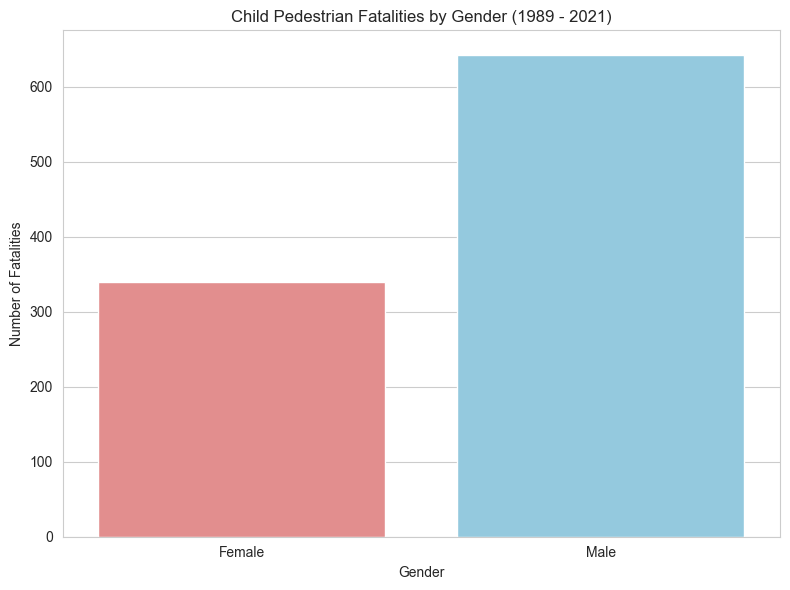

   Gender  Percentage
0  Female   34.521385
1    Male   65.478615


In [11]:
pedestrian_gender_fatalities = pedestrian_children.dropna(subset=['Gender'])

# Group data by Gender, counting all Crash ID occurrences
pedestrian_gender_count = pedestrian_gender_fatalities.groupby('Gender')['Crash ID'].count().reset_index(name='Fatalities')

# Plotting a bar plot for Gender breakdown of pedestrian fatalities
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Fatalities', data=pedestrian_gender_count, hue='Gender', palette=custom_palette, dodge=False, legend=False)
plt.title(f'Child Pedestrian Fatalities by Gender ({earliest_year} - {latest_year})') 
plt.xlabel('Gender')
plt.ylabel('Number of Fatalities')
plt.tight_layout()
plt.show()

# Calculate and print the percentage
pedestrian_gender_count['Percentage'] = (pedestrian_gender_count['Fatalities'] / pedestrian_gender_count['Fatalities'].sum()) * 100
print(pedestrian_gender_count[['Gender', 'Percentage']])



This bar chart shows the distribution of child pedestrian fatalities by gender from 1989 to 2021. Males accounted for 65% of all fatalities, while females made up 35%. Although the disparity is notable, it's less pronounced than in the combined cyclist + pedestrian cohort, suggesting that male overrepresentation is particularly elevated among cyclists — a trend explored later in this report.

## 3.3 Child Cyclist Fatalities


This section explores fatal incidents involving child cyclists, examining trends over time, by location, and demographic patterns to identify risk factors unique to this vulnerable road user group.


### 3.3.1 Child Cyclist Fatalities by Year

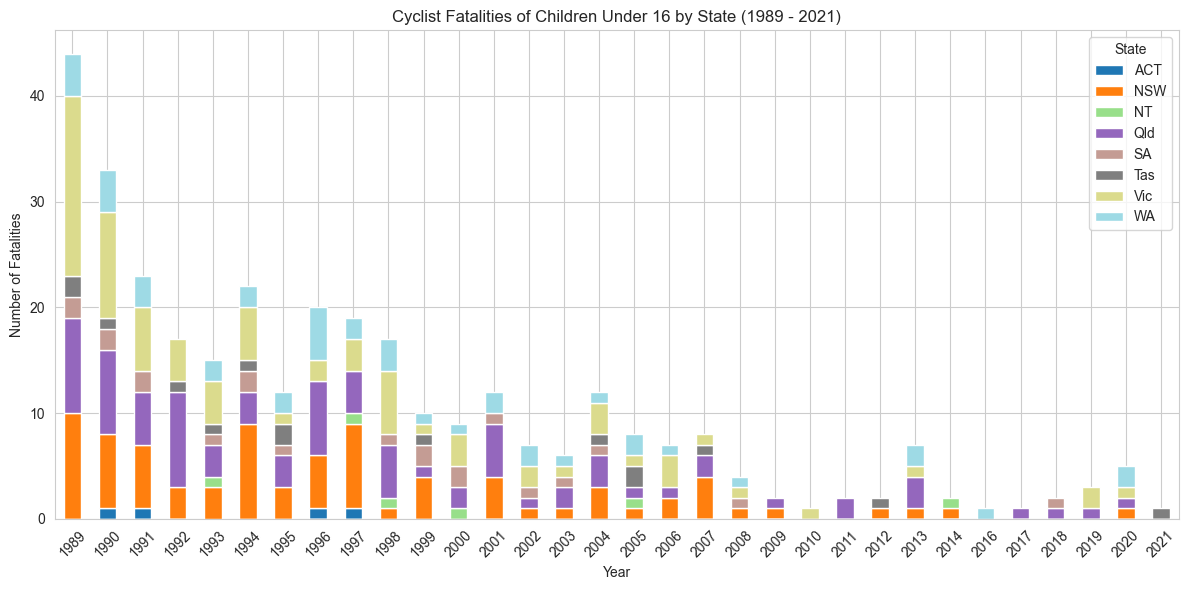

In [12]:

fatalities_by_year_state = cyclist_children.groupby(['Year', 'State'])['Crash ID'].count().reset_index(name='Fatalities')

# Create a DataFrame with all years in the desired range (DYNAMIC)
all_years = pd.DataFrame({'Year': np.arange(earliest_year, latest_year + 1)})

# Merge this with the fatalities_by_year_state DataFrame to include all years
all_years_fatalities = pd.merge(all_years, fatalities_by_year_state, on='Year', how='left')
all_years_fatalities['Fatalities'] = all_years_fatalities['Fatalities'].fillna(0)

# Create a pivot table for the stacked bar chart
pivot_fatalities_state = pd.pivot_table(all_years_fatalities, index='Year', columns='State', values='Fatalities', fill_value=0)


# Sort the index to make sure years are in order
pivot_fatalities_state = pivot_fatalities_state.sort_index()

sns.set_style('whitegrid')
pivot_fatalities_state.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='tab20')
plt.title(f'Cyclist Fatalities of Children Under 16 by State ({earliest_year} - {latest_year})')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.legend(title='State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Notes to self:
# - Check ABS or transport usage datasets for trends in school transport modes over the same period (1989–2021).
# - If cycling to school has dropped, consider citing behavioural/demographic shifts (e.g. rise in car drop-offs, urban sprawl).
# - Add an annotation or footnote on the chart pointing out near-zero years post-2010—reinforces rarity of these events.
# - Explore splitting the graph by urban vs rural (if data allows) to investigate regional patterns in child cyclist fatalities.
# - Optional: Create a faceted version (small multiples) to better visualise each state's trend individually.



This stacked bar chart shows fatal cyclist incidents involving children under 16 across Australian states from 1989 to 2021. There is a clear and sustained decline in fatalities across all jurisdictions over time. While New South Wales, Victoria, and Queensland consistently report the highest counts, the absolute numbers in recent years are very low—often in the single digits. This downward trend may not solely reflect safer road conditions but could also suggest a shift away from cycling as a common mode of transport for children, particularly for school commutes.


### 3.3.2 Child Cyclist Fatalities by Month

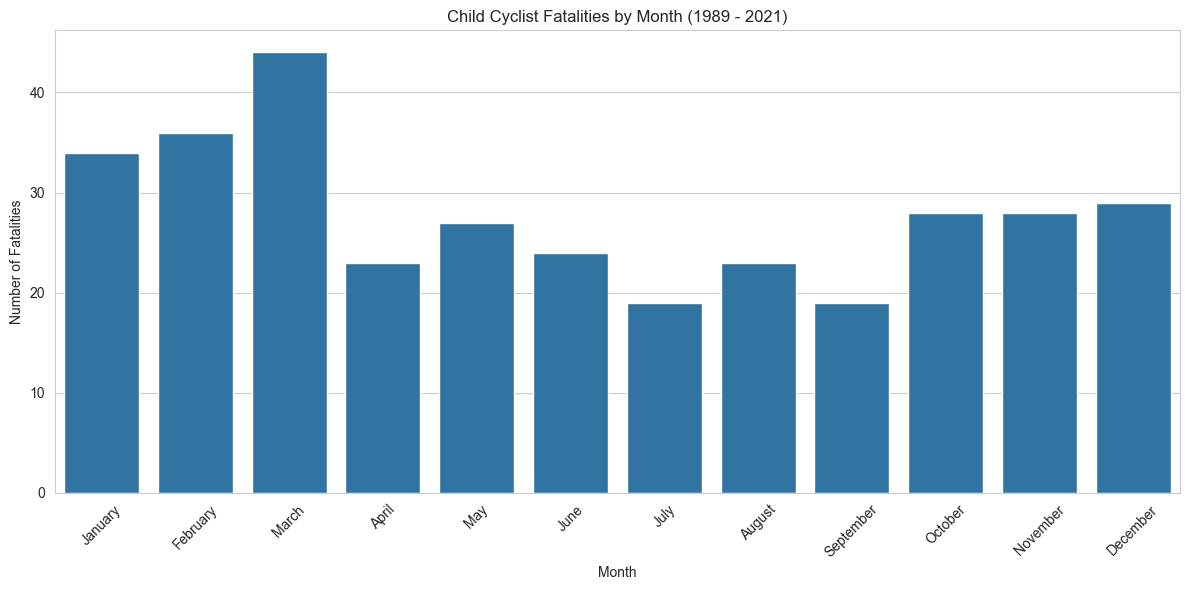

In [13]:

month_counts_cyc_df = cyclist_children.copy() # Use copy only if adding column modifies original view

# Map the month numbers to month names
month_counts_cyc_df['Month Name'] = month_counts_cyc_df['Month'].map(month_names)

# Calculate the number of accidents by month
month_counts = month_counts_cyc_df['Month Name'].value_counts().reset_index()
month_counts.columns = ['Month', 'Fatalities']

month_counts['Month'] = pd.Categorical(month_counts['Month'], categories=month_order, ordered=True)
month_counts = month_counts.sort_values('Month')

# Plotting a bar plot for monthly breakdown
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Fatalities', data=month_counts, dodge=False, legend=False)
plt.title(f'Child Cyclist Fatalities by Month ({earliest_year} - {latest_year})') 
plt.xlabel('Month')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Notes to self:
# - Consider overlaying average national temperature or daylight hours to reinforce seasonal interpretation.
# - If possible, add school holiday annotations (April, July, December/January) — may explain dips and spikes.
# - Compare to weekday/weekend ratios in cyclist fatalities to explore recreational vs commute-related patterns.
# - Optional: Animate with year or cumulative line to show decline across decades alongside seasonality.
# - Long-term idea: Examine school policies on cycling (e.g. infrastructure, encouragement) over time for context.


This bar chart illustrates child cyclist fatalities by month from 1989 to 2021. A distinct seasonal pattern emerges, with higher fatalities during warmer months — particularly March, February, and January — and a sharp decline during the colder months of June through September. This suggests that child cycling activity may be strongly influenced by seasonal weather, with reduced exposure to road environments in winter correlating with fewer fatalities.


### 3.3.3 Child Cyclist Fatalities by Day of Week and Time of Day

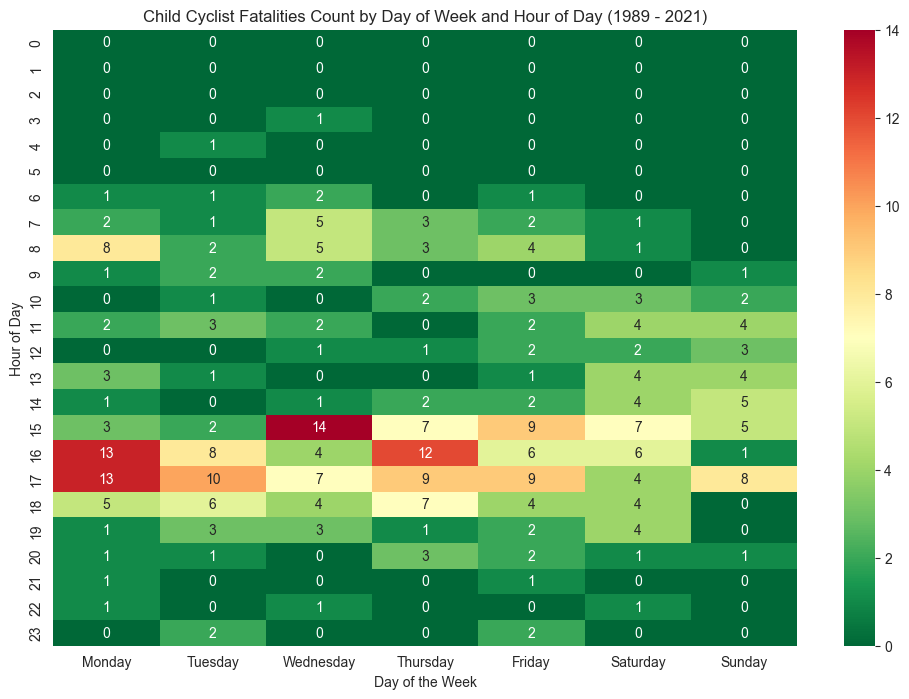

In [14]:


heatmap_df_cyc = cyclist_children[['Time', 'Dayweek']]

# Dropping rows with missing values in 'Time'
heatmap_df_cyc = heatmap_df_cyc.dropna(subset=['Time']).copy() # Add copy here

# Extracting the hour from the time field
heatmap_df_cyc['Hour'] = heatmap_df_cyc['Time'].str.split(':').str[0].astype(int)

# Creating a pivot table to convert the data into wide format
pivot_table_cyc = pd.pivot_table(heatmap_df_cyc,
                             values='Time',
                             index=['Hour'],
                             columns=['Dayweek'],
                             aggfunc='count',
                             fill_value=0)

# Reindex for consistency
pivot_table_cyc = pivot_table_cyc.reindex(range(24), fill_value=0)
pivot_table_cyc = pivot_table_cyc.reindex(columns=day_order, fill_value=0)


# Plotting a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_cyc, # Use reindexed table
            annot=True,
            cmap='RdYlGn_r', # Take a colour palette from https://loading.io/color/feature/RdYlGn-9/ and use _r to flip it so that red is higher and green is lower
            fmt='g')
plt.title(f'Child Cyclist Fatalities Count by Day of Week and Hour of Day ({earliest_year} - {latest_year})') 
plt.xlabel('Day of the Week')
plt.ylabel('Hour of Day')
plt.show()

# Notes to self:
# - Consider comparing this with pedestrian heatmap to explore mode-of-travel differences.
# - Explore population-level cycling participation rates among children over time (e.g., ABS or VicHealth reports).
# - If available, overlay school zones or proximity to residential areas in spatial plots for deeper insight.
# - You could normalize by hour-of-day traffic volume if any datasets are available (e.g., school commute data).
# - Could be interesting to explore helmet legislation, bike lanes, or safety campaigns rolled out over the decades.
# - If building an animation later, highlight how afternoon hours remain consistently high-risk.


This heatmap displays the distribution of child cyclist fatalities by hour of the day and day of the week from 1989 to 2021. A distinct concentration appears during weekday afternoons, particularly between 3–6 PM, which coincides with the after-school period. Weekend fatalities are more evenly distributed across daylight hours. The overall low fatality counts highlight the relatively small number of incidents, potentially reflecting a decline in cycling participation among children or improvements in road safety.


### 3.3.4 Child Cyclist Fatalities by Gender

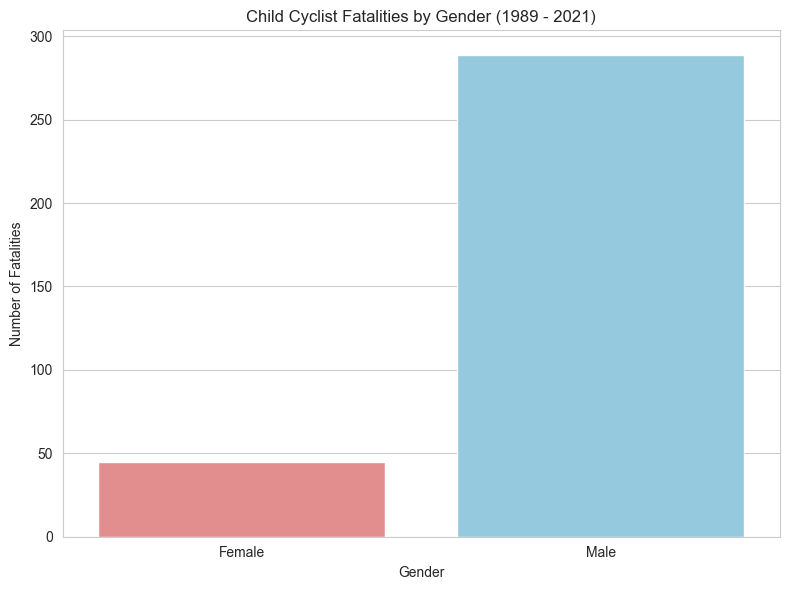

   Gender  Percentage
0  Female   13.473054
1    Male   86.526946


In [15]:


# Filter for valid entries in 'Gender'
gender_fatalities_cyc = cyclist_children.dropna(subset=['Gender']) # Changed variable name slightly for clarity

# Group data by Gender, counting all Crash ID occurrences
gender_count_cyc = gender_fatalities_cyc.groupby('Gender')['Crash ID'].count().reset_index(name='Fatalities')

# Plotting a bar plot for Gender breakdown
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Fatalities', data=gender_count_cyc, hue='Gender', palette=custom_palette, dodge=False, legend=False)
plt.title(f'Child Cyclist Fatalities by Gender ({earliest_year} - {latest_year})') 
plt.xlabel('Gender')
plt.ylabel('Number of Fatalities')
plt.tight_layout()
plt.show()

# Calculate and print the percentage for consistency
gender_count_cyc['Percentage'] = (gender_count_cyc['Fatalities'] / gender_count_cyc['Fatalities'].sum()) * 100
print(gender_count_cyc[['Gender', 'Percentage']])

# Notes to self:
# - Follow up with participation rate data (e.g., ABS, VicHealth, AusCycle) to contextualize the gender split.
# - Consider incorporating qualitative data or surveys on why girls might cycle less (uniforms, parental concerns, social norms).
# - Explore literature on gender differences in childhood risk exposure or injury rates.
# - Would benefit from a stacked bar or percent-normalized visual if participation data is found.
# - Future addition: small multiples by age band to see if the gender gap widens with age.


This bar chart shows a pronounced gender disparity in child cyclist fatalities: 87% of deaths were male, compared to just 13% female. This gap may reflect a combination of factors — from lower cycling participation among girls, to social norms, clothing barriers (e.g., school uniforms), parental attitudes, or differences in risk-taking behavior. The gender imbalance seen here is far greater than in pedestrian fatalities, suggesting a need for further investigation into who is cycling, where, and under what conditions.

## 4. Conclusion

This exploratory analysis highlights consistent patterns in child pedestrian and cyclist fatalities across Australia between 1989 and 2021. The data reflect clear improvements in safety outcomes over time, yet notable vulnerabilities remain — particularly in temporal clustering, gender disparity, and geographic variability.

While pedestrian fatalities have declined more significantly, the persistence of cyclist deaths — especially among boys — calls for deeper investigation into behavioral, cultural, and infrastructural factors. Time-of-day clustering around school transit periods reinforces the need for targeted safety interventions.

Future work may focus on integrating spatial data, school zone mapping, or mobility trends to explore contextual contributors to these incidents. This project demonstrates the value of EDA in generating hypotheses and guiding data-driven public health planning.
